In [8]:
import io
from IPython.nbformat import current

def execute_notebook(nbfile):
    
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    
    ip = get_ipython()
    
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../workers/Imports.ipynb")
execute_notebook("../workers/scoring_system.ipynb")

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['angle', 'datetime', 'absolute']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


6.6899999999999995

In [15]:
df = pd.read_csv('../../processed_data/identified_shots.csv', index_col=0)
df = df[df.player_id != '(null)']
df.player_id = df.player_id.astype(str)
len(df)

In [10]:
# Import individual percentages (processed and selected by movement)
player_percentages = pd.read_csv('../../processed_data/players_percentages.18_22.csv', index_col=0)

In [11]:
players = [str(x) for x in list(player_percentages[player_percentages.Number_of_shots > 1000].Player)]

In [12]:
distance_min, distance_max = 18, 22

In [16]:
correlations, shooting_percentages = [], []
for i, player in enumerate(players[:506]):
    player_df_by_date, player_average = get_player_df_by_session_with_movement(player, distance_min, distance_max, 25)
    
    averages, dates, movement, = [], [], []
    for x in player_df_by_date:
        if len(player_df_by_date) > 6:
            movement.append(x['movement'].mean())
            averages.append(x.numeric_make_miss.mean())
            dates.append(list(x.date)[0])

    correlations.append(sp.spearmanr(movement, averages))
    shooting_percentages.append(player_average)        

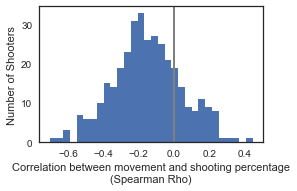

In [18]:
sns.set_style("white")
plt.figure(figsize=(4, 2.5))
ax = pd.Series([x[0] for x in correlations]).hist(bins=30)
plt.xlabel('Correlation between movement and shooting percentage\n(Spearman Rho)')
plt.ylabel('Number of Shooters')
ax.grid(False)
plt.axvline(0, c='0.5', lw=2)
plt.savefig('../../figures/shooter_movement.all.pdf')